In [ ]:
## general
import numpy as np
import datetime
import joblib
import copy
import xarray as xr
import os
import sys
import datetime as dt
import matplotlib as mpl
import math
import joblib

## statistics
from scipy import stats
from scipy.stats import linregress

## plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import mplotutils as mpu



In [139]:
# load the land mask as frac_l
dir_in_geo_dist = '/home/tristan/mesmer/data/'
frac_l = xr.open_mfdataset(dir_in_geo_dist + 'interim_invariant_lsmask_regrid.nc', combine='by_coords',decode_times=False)

frac_l_raw = np.squeeze(copy.deepcopy(frac_l.lsm.values))  #land-sea mask of ERA-interim bilinearily interpolated 

frac_l = frac_l.where(frac_l.lat>-60,0)  # remove Antarctica from frac_l field (ie set frac l to 0)

idx_l=np.squeeze(frac_l.lsm.values)>0.0 # idx_l = index land -> idex land #-> everything >0 we consider as land

lon_pc, lat_pc = mpu.infer_interval_breaks(frac_l.lon, frac_l.lat)  ## is this needed??

In [140]:
dir_in_data_mod = '/home/tristan/mesmer/data/'

y_all = joblib.load(dir_in_data_mod+'y_all_fix.pkl')
y_all_mon = joblib.load(dir_in_data_mod+'y_all_mon_fix.pkl')

# First calculate slope and intercept on a single gridpoint, for 1950 to 1980

## start with Jan

In [141]:
## monthly data

y_mon_clm = y_all_mon[492:852] # 1951 until 1980
y_mon_clm.shape

y_mon_clm_jan = y_mon_clm[0::12]  # select the January month
y_mon_clm_jan.shape

(30, 3043)

In [142]:
## anunual data

y_ann_clm = y_all[41:71] # 1951 until 1980
y_ann_clm.shape

(30, 3043)

In [143]:
# perform linear regression of annual (x-axis) vs monthly (y-axis) temps

idx_slope = np.zeros(3043)
idx_intercept = np.zeros(3043)

########### calculate slope and intercept terms for y_all and y_all_mon for each gridpoint

for i in np.arange(3043):
    idx_slope[i], idx_intercept[i], r, p, se = linregress(y_ann_clm[:,i], y_mon_clm_jan[:,i])

    
print(idx_slope.max(), idx_slope.min())    

4.076132263875565 -0.3513949744834041


In [144]:
## apply land mask #####################################################################

y_ma_jan = np.zeros(idx_l.shape)                       ## create y_ma empty array of correct size
y_ma_jan = ma.masked_array(y_ma_jan, mask=idx_l==False)    ## apply land mask to this array
y_ma_jan[idx_l]=idx_slope                              ## apply this mask to the idx_slope data      

print(y_ma_jan.min(), y_ma_jan.max())

-0.3513949744834041 4.076132263875565


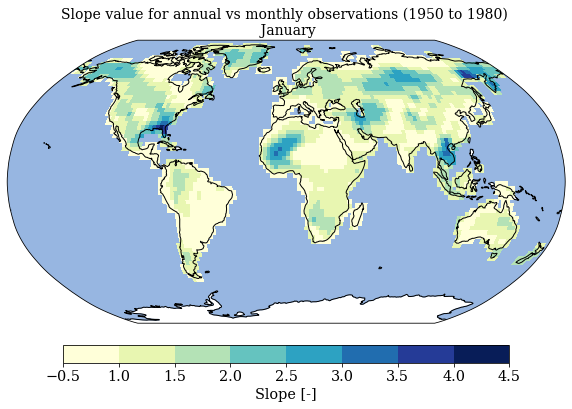

In [145]:
fig=plt.figure(figsize=(10,20))
ax=fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=0))

bounds = np.array([-0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cmap = plt.cm.get_cmap('YlGnBu')

mesh_1=ax.pcolormesh(lon_pc, lat_pc, y_ma_jan, cmap=cmap,norm=norm, transform=ccrs.PlateCarree(),rasterized=True)

ax.set_title('Slope value for annual vs monthly observations (1950 to 1980) \n January',fontsize=14)
#ax.add_feature(cfeature.OCEAN)
cbar=plt.colorbar(mesh_1,ax=[ax],orientation='horizontal',ticks=([-0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]),shrink=0.8,pad=0.02,aspect=25)
cbar.set_label('Slope [-]')  
    
ax.coastlines()
ax.add_feature(cfeature.OCEAN)
plt.show()

## now for July

In [146]:
## monthly data

y_mon_clm = y_all_mon[492:852] # 1951 until 1980
y_mon_clm.shape

y_mon_clm_jul = y_mon_clm[6::12]  # select the January month
y_mon_clm_jul.shape

(30, 3043)

In [147]:
## anunual data

y_ann_clm = y_all[41:71] # 1951 until 1980
y_ann_clm.shape

(30, 3043)

In [148]:
# perform linear regression of annual (x-axis) vs monthly (y-axis) temps

idx_slope = np.zeros(3043)
idx_intercept = np.zeros(3043)

########### calculate slope and intercept terms for y_all and y_all_mon for each gridpoint

for i in np.arange(3043):
    idx_slope[i], idx_intercept[i], r, p, se = linregress(y_ann_clm[:,i], y_mon_clm_jul[:,i])

    
print(idx_slope.max(), idx_slope.min())    

2.532812418112451 -0.32631761610906407


In [149]:
## apply land mask #####################################################################

y_ma_jul = np.zeros(idx_l.shape)                       ## create y_ma empty array of correct size
y_ma_jul = ma.masked_array(y_ma_jul, mask=idx_l==False)    ## apply land mask to this array
y_ma_jul[idx_l]=idx_slope                              ## apply this mask to the idx_slope data      

print(y_ma_jul.min(), y_ma_jul.max())

-0.32631761610906407 2.532812418112451


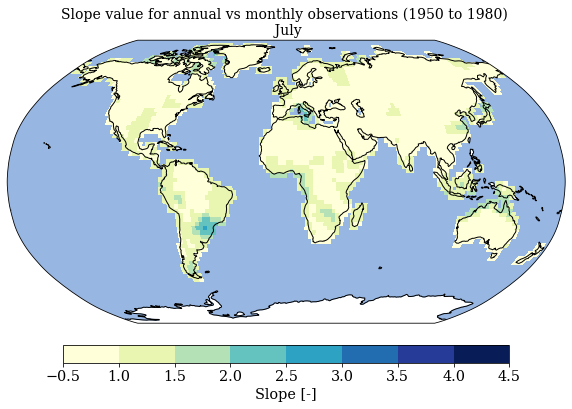

In [150]:
fig=plt.figure(figsize=(10,20))
ax=fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=0))

bounds = np.array([-0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cmap = plt.cm.get_cmap('YlGnBu')

mesh_1=ax.pcolormesh(lon_pc, lat_pc, y_ma_jul, cmap=cmap,norm=norm, transform=ccrs.PlateCarree(),rasterized=True)

ax.set_title('Slope value for annual vs monthly observations (1950 to 1980) \n July',fontsize=14)
cbar=plt.colorbar(mesh_1,ax=[ax],orientation='horizontal',ticks=([-0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]),shrink=0.8,pad=0.02,aspect=25)
cbar.set_label('Slope [-]')  
    
ax.coastlines()
ax.add_feature(cfeature.OCEAN)
plt.show()

# Now do this for more recent time step

In [151]:
## monthly data

y_mon_prs = y_all_mon[720:] # 1970 until 2022

y_mon_prs_jan = y_mon_prs[0::12]  # select the January month
y_mon_prs_jul = y_mon_prs[6::12]

In [152]:
## anunual data

y_ann_prs = y_all[60:] # 1970 until 1980
y_ann_prs.shape

(52, 3043)

In [153]:
# first Jan: perform linear regression of annual (x-axis) vs monthly (y-axis) temps

idx_slope = np.zeros(3043)
idx_intercept = np.zeros(3043)

########### calculate slope and intercept terms for y_all and y_all_mon for each gridpoint

for i in np.arange(3043):
    idx_slope[i], idx_intercept[i], r, p, se = linregress(y_ann_prs[:,i], y_mon_prs_jan[:,i])

    
print(idx_slope.max(), idx_slope.min()) 

3.127409690045798 0.24631577507439284


In [154]:
## apply land mask #####################################################################

y_ma_prs_jan = np.zeros(idx_l.shape)                       ## create y_ma empty array of correct size
y_ma_prs_jan = ma.masked_array(y_ma_prs_jan, mask=idx_l==False)    ## apply land mask to this array
y_ma_prs_jan[idx_l]=idx_slope                              ## apply this mask to the idx_slope data      

print(y_ma_prs_jan.min(), y_ma_prs_jan.max())

0.24631577507439284 3.127409690045798


In [155]:
# now July: perform linear regression of annual (x-axis) vs monthly (y-axis) temps

idx_slope = np.zeros(3043)
idx_intercept = np.zeros(3043)

########### calculate slope and intercept terms for y_all and y_all_mon for each gridpoint

for i in np.arange(3043):
    idx_slope[i], idx_intercept[i], r, p, se = linregress(y_ann_prs[:,i], y_mon_prs_jul[:,i])

    
print(idx_slope.max(), idx_slope.min()) 

2.052089255605819 0.06129196615808465


In [156]:
## apply land mask #####################################################################

y_ma_prs_jul = np.zeros(idx_l.shape)                       ## create y_ma empty array of correct size
y_ma_prs_jul = ma.masked_array(y_ma_prs_jul, mask=idx_l==False)    ## apply land mask to this array
y_ma_prs_jul[idx_l]=idx_slope                              ## apply this mask to the idx_slope data      

print(y_ma_prs_jul.min(), y_ma_prs_jul.max())

0.06129196615808465 2.052089255605819


# Now for most recent timestep

In [165]:
## monthly data for Jan and Jul
y_mon_rct = y_all_mon[960:] # 1990 until 2022
y_mon_rct.shape

y_mon_rct_jan = y_mon_rct[0::12]  # select the January month
y_mon_rct_jul = y_mon_rct[6::12]

In [166]:
## anunual data

y_ann_rct = y_all[80:] # 1990 until 1980
y_ann_rct.shape

(32, 3043)

In [167]:
# first for Jan: perform linear regression of annual (x-axis) vs monthly (y-axis) temps

idx_slope = np.zeros(3043)
idx_intercept = np.zeros(3043)

########### calculate slope and intercept terms for y_all and y_all_mon for each gridpoint

for i in np.arange(3043):
    idx_slope[i], idx_intercept[i], r, p, se = linregress(y_ann_rct[:,i], y_mon_rct_jan[:,i])

    
print(idx_slope.max(), idx_slope.min()) 

3.305359505655333 -0.4202415874113852


In [168]:
## apply land mask #####################################################################

y_ma_rct_jan = np.zeros(idx_l.shape)                       ## create y_ma empty array of correct size
y_ma_rct_jan = ma.masked_array(y_ma_rct_jan, mask=idx_l==False)    ## apply land mask to this array
y_ma_rct_jan[idx_l]=idx_slope                              ## apply this mask to the idx_slope data      

print(y_ma_rct_jan.min(), y_ma_rct_jan.max())

-0.4202415874113852 3.305359505655333


In [169]:
# now for July: perform linear regression of annual (x-axis) vs monthly (y-axis) temps

idx_slope = np.zeros(3043)
idx_intercept = np.zeros(3043)

########### calculate slope and intercept terms for y_all and y_all_mon for each gridpoint

for i in np.arange(3043):
    idx_slope[i], idx_intercept[i], r, p, se = linregress(y_ann_rct[:,i], y_mon_rct_jul[:,i])

    
print(idx_slope.max(), idx_slope.min()) 

2.5408735241276794 -0.3673024735574842


In [170]:
## apply land mask #####################################################################

y_ma_rct_jul = np.zeros(idx_l.shape)                       ## create y_ma empty array of correct size
y_ma_rct_jul = ma.masked_array(y_ma_rct_jul, mask=idx_l==False)    ## apply land mask to this array
y_ma_rct_jul[idx_l]=idx_slope                              ## apply this mask to the idx_slope data      

print(y_ma_rct_jul.min(), y_ma_rct_jul.max())

-0.3673024735574842 2.5408735241276794


# Do a nice set of plots to compare climatology to full obs 

In [163]:
### set plot params

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
          'figure.figsize': (9,5),
          "font.family": "serif",
         'ytick.labelsize':'x-large',
         "font.weight":"normal",
         "axes.labelweight":"normal"}
plt.rcParams.update(params)

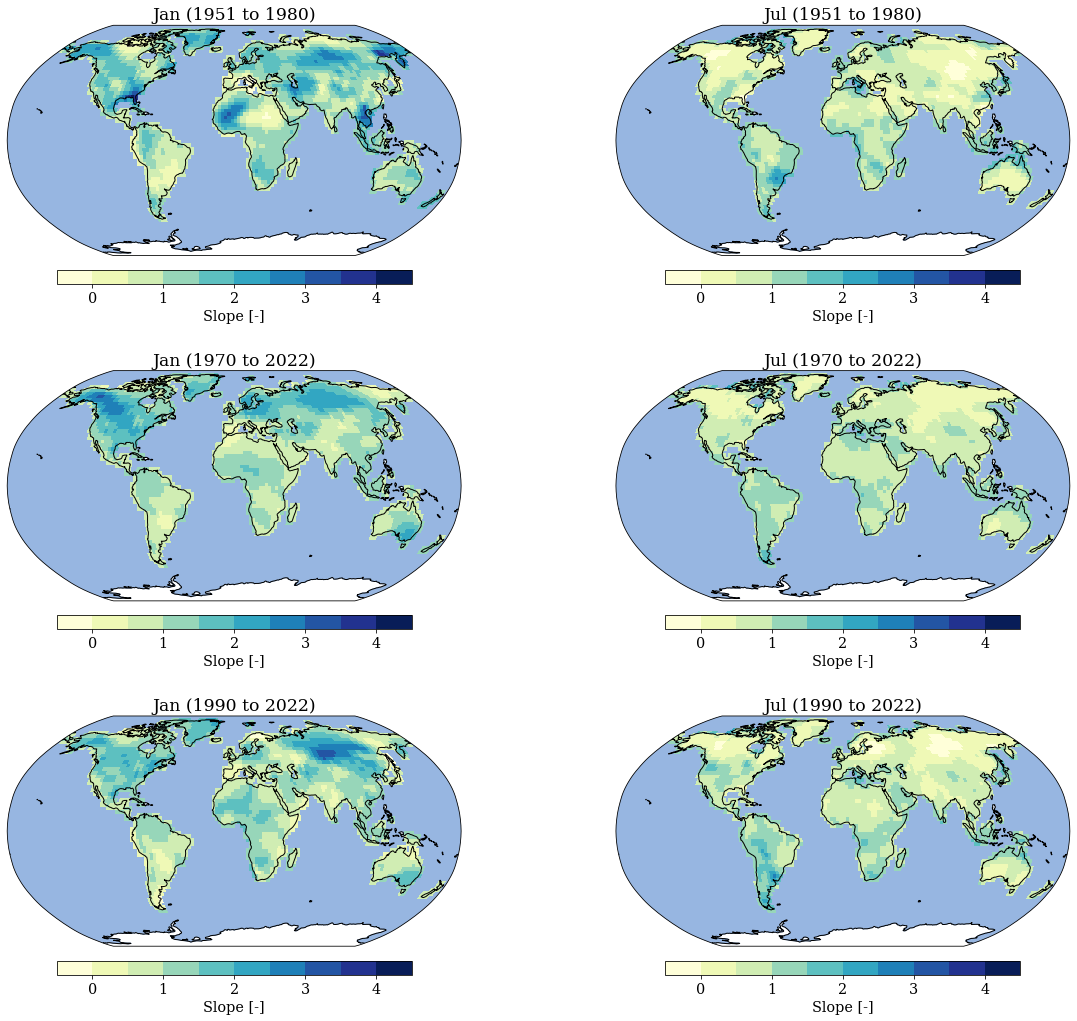

In [171]:
nrows = 3
ncols = 2

# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                        subplot_kw={'projection': ccrs.Robinson(central_longitude=0)},
                        figsize=(20,18))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
ax=ax.flatten()

## set bounds and norms
bounds = np.array([-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cmap = plt.cm.get_cmap('YlGnBu')

############# climatological timesteps ##################################
## plot the slope for Jan climatology
ax[0].set_title('Jan (1951 to 1980)')
mesh_1=ax[0].pcolormesh(lon_pc, lat_pc, y_ma_jan, cmap=cmap,norm=norm, transform=ccrs.PlateCarree(),rasterized=True)
ax[0].coastlines()
ax[0].add_feature(cfeature.OCEAN)
cbar=plt.colorbar(mesh_1,ax=ax[0],orientation='horizontal',ticks=([0.0, 1.0, 2.0, 3.0, 4.0]),shrink=0.7,pad=0.05,aspect=25)
cbar.set_label('Slope [-]') 

## plot the slope for July climatology
ax[1].set_title('Jul (1951 to 1980)')
mesh_1=ax[1].pcolormesh(lon_pc, lat_pc, y_ma_jul, cmap=cmap,norm=norm, transform=ccrs.PlateCarree(),rasterized=True)
ax[1].coastlines()
ax[1].add_feature(cfeature.OCEAN)
cbar=plt.colorbar(mesh_1,ax=ax[1],orientation='horizontal',ticks=([0.0, 1.0, 2.0, 3.0, 4.0]),shrink=0.7,pad=0.05,aspect=25)
cbar.set_label('Slope [-]') 

############# more recent timesteps ##################################
## plot the slope for Jan 1975-2022
ax[2].set_title('Jan (1970 to 2022)')
mesh_1=ax[2].pcolormesh(lon_pc, lat_pc, y_ma_prs_jan, cmap=cmap,norm=norm, transform=ccrs.PlateCarree(),rasterized=True)
ax[2].coastlines()
ax[2].add_feature(cfeature.OCEAN)
cbar=plt.colorbar(mesh_1,ax=ax[2],orientation='horizontal',ticks=([0.0, 1.0, 2.0, 3.0, 4.0]),shrink=0.7,pad=0.05,aspect=25)
cbar.set_label('Slope [-]') 

## plot the slope for Julx 1975-2022
ax[3].set_title('Jul (1970 to 2022)')
mesh_1=ax[3].pcolormesh(lon_pc, lat_pc, y_ma_prs_jul, cmap=cmap,norm=norm, transform=ccrs.PlateCarree(),rasterized=True)
ax[3].coastlines()
ax[3].add_feature(cfeature.OCEAN)
cbar=plt.colorbar(mesh_1,ax=ax[3],orientation='horizontal',ticks=([0.0, 1.0, 2.0, 3.0, 4.0]),shrink=0.7,pad=0.05,aspect=25)
cbar.set_label('Slope [-]') 

############# most recent timesteps ##################################
## plot the slope for Jan 1990-2022
ax[4].set_title('Jan (1990 to 2022)')
mesh_1=ax[4].pcolormesh(lon_pc, lat_pc, y_ma_rct_jan, cmap=cmap,norm=norm, transform=ccrs.PlateCarree(),rasterized=True)
ax[4].coastlines()
ax[4].add_feature(cfeature.OCEAN)
cbar=plt.colorbar(mesh_1,ax=ax[4],orientation='horizontal',ticks=([0.0, 1.0, 2.0, 3.0, 4.0]),shrink=0.7,pad=0.05,aspect=25)
cbar.set_label('Slope [-]') 

## plot the slope for Julx 1990-2022
ax[5].set_title('Jul (1990 to 2022)')
mesh_1=ax[5].pcolormesh(lon_pc, lat_pc, y_ma_rct_jul, cmap=cmap,norm=norm, transform=ccrs.PlateCarree(),rasterized=True)
ax[5].coastlines()
ax[5].add_feature(cfeature.OCEAN)
cbar=plt.colorbar(mesh_1,ax=ax[5],orientation='horizontal',ticks=([0.0, 1.0, 2.0, 3.0, 4.0]),shrink=0.7,pad=0.05,aspect=25)
cbar.set_label('Slope [-]') 


plt.subplots_adjust(wspace=0.20, hspace=0.20)